# Lesson 1 - What's your arch?

Downloaded dataset from:
    https://sites.google.com/site/zhexuutssjtu/projects/arch
    


## Move arcDataset

In [9]:
from glob import glob
import shutil

In [26]:
base_paths = ['/data/arcDataset/train','/data/arcDataset/valid','/data/arcDataset/test']
for path in base_paths:
    if not os.path.exists(path):
        os.makedirs(path)

In [51]:
arch_folders = list(set(glob('/data/arcDataset/*')) - set(glob('/data/arcDataset/*.txt')+glob('/data/arcDataset/Read*')+base_paths))

In [52]:
arch_folders

['/data/arcDataset/Georgian architecture',
 '/data/arcDataset/Tudor Revival architecture',
 '/data/arcDataset/Chicago school architecture',
 '/data/arcDataset/Palladian architecture',
 '/data/arcDataset/Byzantine architecture',
 '/data/arcDataset/American Foursquare architecture',
 '/data/arcDataset/Beaux-Arts architecture',
 '/data/arcDataset/Achaemenid architecture',
 '/data/arcDataset/Deconstructivism',
 '/data/arcDataset/Romanesque architecture',
 '/data/arcDataset/Queen Anne architecture',
 '/data/arcDataset/Novelty architecture',
 '/data/arcDataset/Edwardian architecture',
 '/data/arcDataset/Bauhaus architecture',
 '/data/arcDataset/American craftsman style',
 '/data/arcDataset/International style',
 '/data/arcDataset/Art Nouveau architecture']

In [53]:
for orig_arch_folder in arch_folders:
    split_arch_folder = orig_arch_folder.split('/')
    split_arch_folder.insert(3,'train')
    dest_arch_folder = '/'.join(split_arch_folder)
    shutil.move(orig_arch_folder,dest_arch_folder)

In [58]:
arch_folders = list(set(glob('/data/arcDataset/train/*')) - set(glob('/data/arcDataset/*.txt')+glob('/data/arcDataset/Read*')+base_paths))

In [64]:
for orig_arch_folder in arch_folders:
    split_arch_folder = orig_arch_folder.split('/')
    split_arch_folder.pop(3)
    split_arch_folder.insert(3,'test')
    dest_arch_folder = '/'.join(split_arch_folder)
    print(dest_arch_folder)
    if not os.path.exists(dest_arch_folder):
        os.makedirs(dest_arch_folder)

/data/arcDataset/test/Greek Revival architecture
/data/arcDataset/test/Postmodern architecture
/data/arcDataset/test/Novelty architecture
/data/arcDataset/test/Queen Anne architecture
/data/arcDataset/test/Gothic architecture
/data/arcDataset/test/Romanesque architecture
/data/arcDataset/test/Achaemenid architecture
/data/arcDataset/test/Georgian architecture
/data/arcDataset/test/Deconstructivism
/data/arcDataset/test/Art Nouveau architecture
/data/arcDataset/test/Bauhaus architecture
/data/arcDataset/test/Art Deco architecture
/data/arcDataset/test/International style
/data/arcDataset/test/American craftsman style
/data/arcDataset/test/Edwardian architecture
/data/arcDataset/test/Tudor Revival architecture
/data/arcDataset/test/American Foursquare architecture
/data/arcDataset/test/Byzantine architecture
/data/arcDataset/test/Chicago school architecture
/data/arcDataset/test/Baroque architecture
/data/arcDataset/test/Russian Revival architecture
/data/arcDataset/test/Beaux-Arts archi

In [134]:
for orig_arch_folder in arch_folders:
    #print(len(glob(f'{orig_arch_folder}/*')),orig_arch_folder)
#     print(int(len(glob(f'{orig_arch_folder}/*'))*.2))
    train_images = glob(f'{orig_arch_folder}/*')
    test_num = int(len(train_images)*.2)
    test_images = np.random.choice(train_images,test_num,replace=False)
    for test_image in test_images:
        orig_test_image = test_image
        split_test_image = test_image.split('/')
        split_test_image.pop(3)
        split_test_image.insert(3,'test')
        test_image = '/'.join(split_test_image)
    #     print(orig_test_image,'\n',test_image)
    #     break
        shutil.move(orig_test_image,test_image)

59
32
42
85
21
21
13
30
42
90
18
73
41
39
15
32
11
22
30
47
28
38
22
51
35


# Run

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [4]:
path = Path('/data/arcDataset')

In [8]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, valid_pct=.25)


In [9]:
data.train_ds

LabelList
y: CategoryList (3573 items)
[Category Postmodern architecture, Category Postmodern architecture, Category Postmodern architecture, Category Postmodern architecture, Category Postmodern architecture]...
Path: /data/arcDataset
x: ImageItemList (3573 items)
[Image (3, 599, 436), Image (3, 600, 450), Image (3, 600, 450), Image (3, 599, 452), Image (3, 600, 450)]...
Path: /data/arcDataset

In [10]:
data.valid_ds

LabelList
y: CategoryList (1191 items)
[Category Beaux-Arts architecture, Category Tudor Revival architecture, Category International style, Category Baroque architecture, Category Baroque architecture]...
Path: /data/arcDataset
x: ImageItemList (1191 items)
[Image (3, 448, 800), Image (3, 599, 777), Image (3, 600, 400), Image (3, 600, 450), Image (3, 511, 800)]...
Path: /data/arcDataset

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

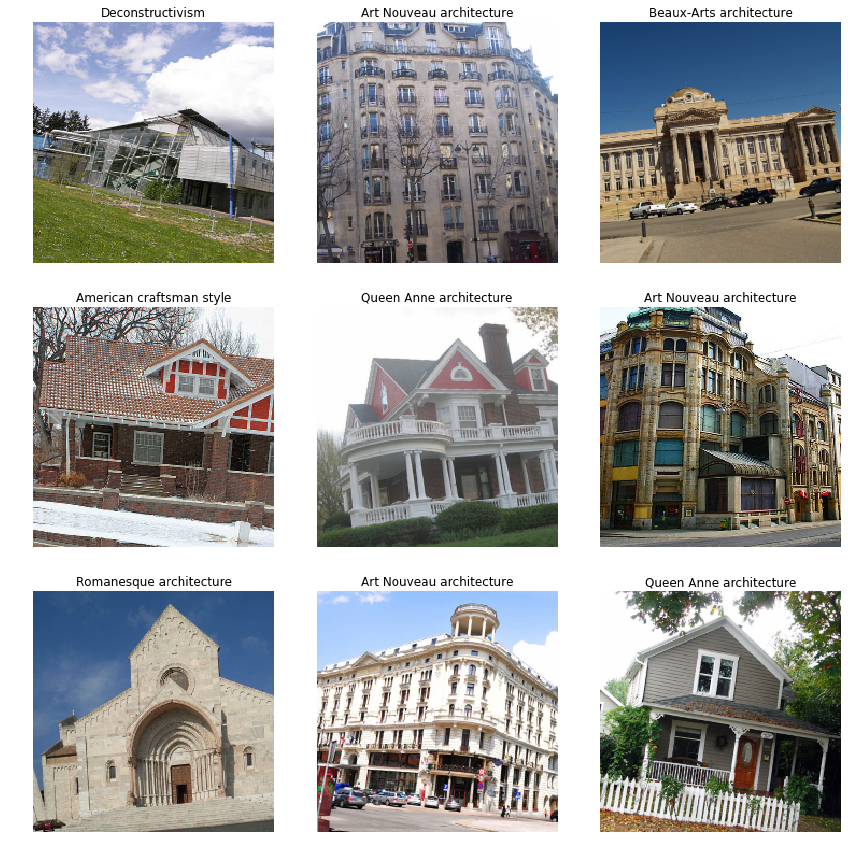

In [11]:
data.show_batch(rows=3)

In [13]:
print(data.classes)
len(data.classes),data.c

['Achaemenid architecture', 'American Foursquare architecture', 'American craftsman style', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Romanesque architecture', 'Russian Revival architecture', 'Tudor Revival architecture']


(25, 25)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [16]:
learn.load('arch-rnet34-s1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (3573 items)
[Category Postmodern architecture, Category Postmodern architecture, Category Postmodern architecture, Category Postmodern architecture, Category Postmodern architecture]...
Path: /data/arcDataset
x: ImageItemList (3573 items)
[Image (3, 599, 436), Image (3, 600, 450), Image (3, 600, 450), Image (3, 599, 452), Image (3, 600, 450)]...
Path: /data/arcDataset;

Valid: LabelList
y: CategoryList (1191 items)
[Category Beaux-Arts architecture, Category Tudor Revival architecture, Category International style, Category Baroque architecture, Category Baroque architecture]...
Path: /data/arcDataset
x: ImageItemList (1191 items)
[Image (3, 448, 800), Image (3, 599, 777), Image (3, 600, 400), Image (3, 600, 450), Image (3, 511, 800)]...
Path: /data/arcDataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps

In [17]:
learn.fit_one_cycle(1)

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

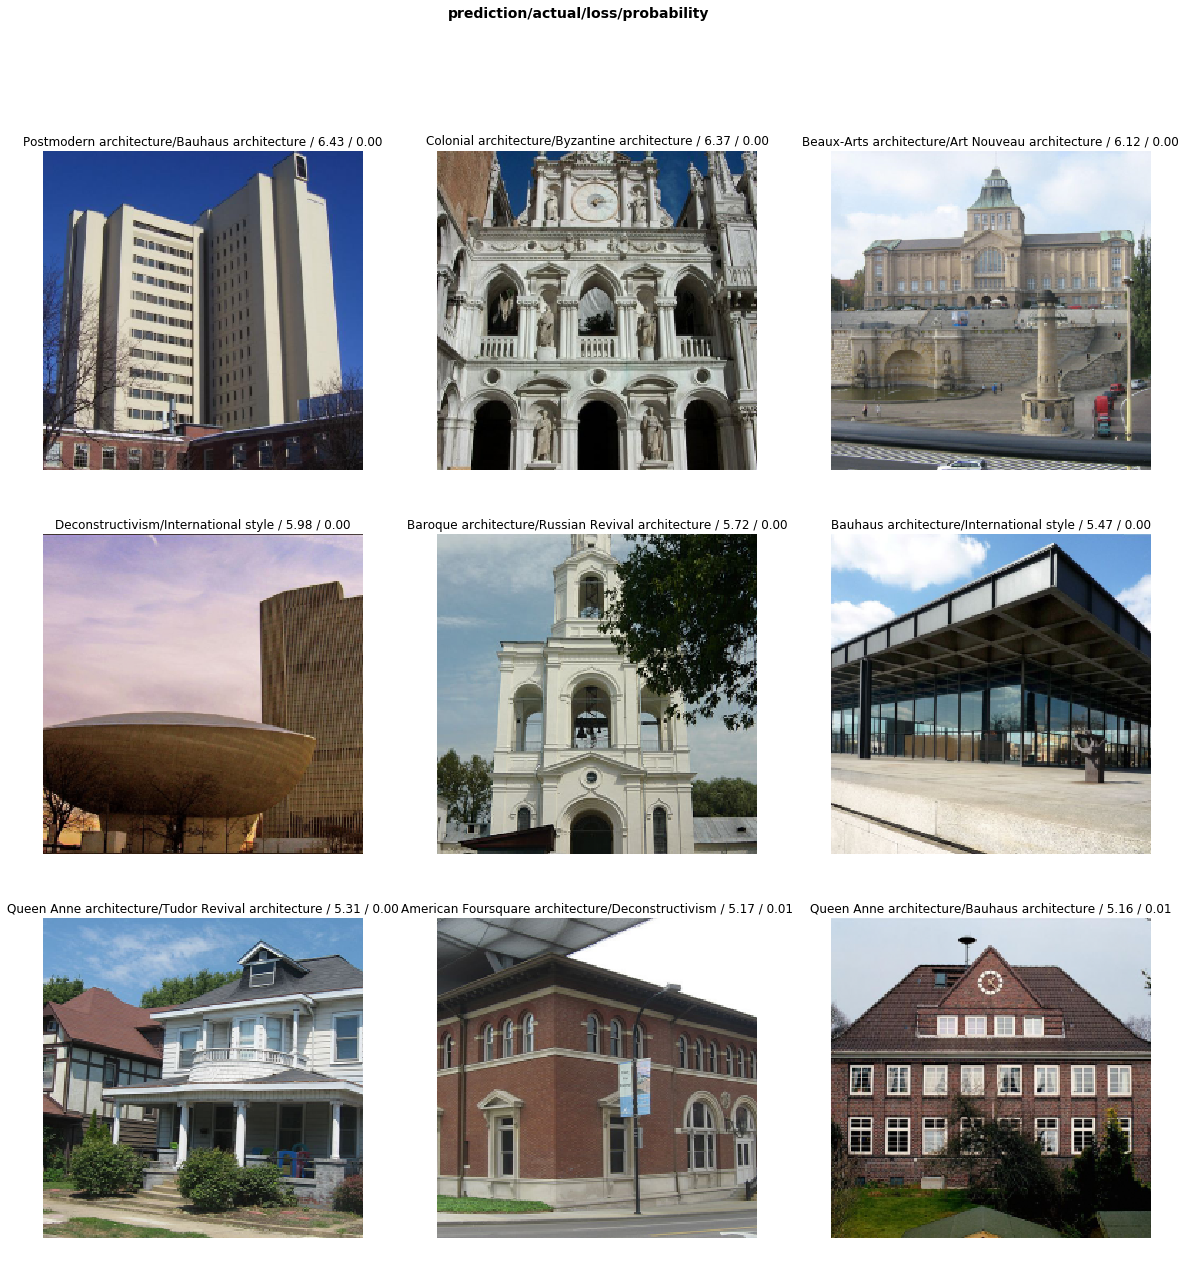

In [21]:
interp.plot_top_losses(9, figsize=(20,20))

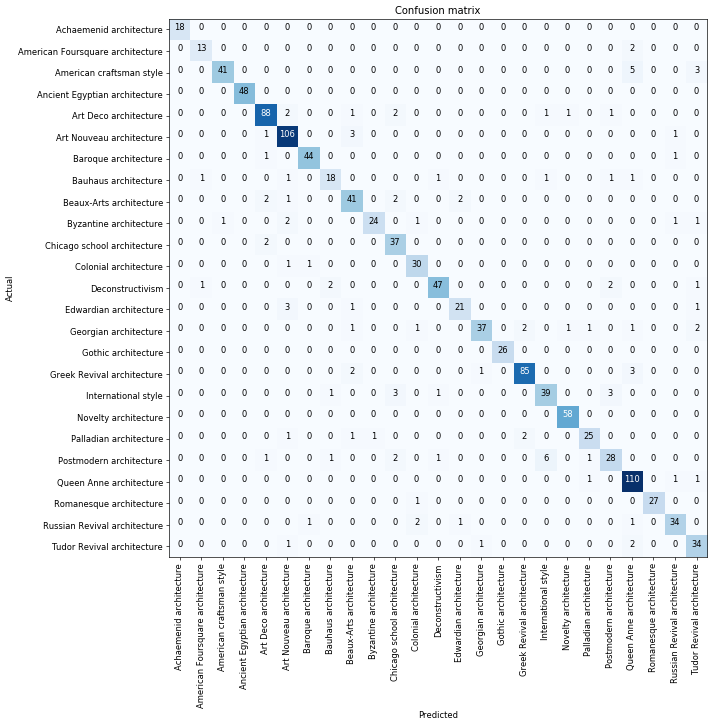

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [164]:
interp.most_confused(min_val=2)

[('Tudor Revival architecture', 'Queen Anne architecture', 10),
 ('International style', 'Art Deco architecture', 9),
 ('American craftsman style', 'Queen Anne architecture', 8),
 ('Queen Anne architecture', 'American craftsman style', 8),
 ('American Foursquare architecture', 'American craftsman style', 7),
 ('Art Deco architecture', 'Art Nouveau architecture', 7),
 ('International style', 'Postmodern architecture', 7),
 ('Russian Revival architecture', 'Baroque architecture', 7),
 ('Beaux-Arts architecture', 'Art Nouveau architecture', 6),
 ('Postmodern architecture', 'International style', 6),
 ('American Foursquare architecture', 'Queen Anne architecture', 5),
 ('Bauhaus architecture', 'Art Deco architecture', 5),
 ('Greek Revival architecture', 'Queen Anne architecture', 5),
 ('Art Deco architecture', 'Beaux-Arts architecture', 4),
 ('Art Nouveau architecture', 'Beaux-Arts architecture', 4),
 ('Baroque architecture', 'Russian Revival architecture', 4),
 ('Beaux-Arts architecture',

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [23]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(1)

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


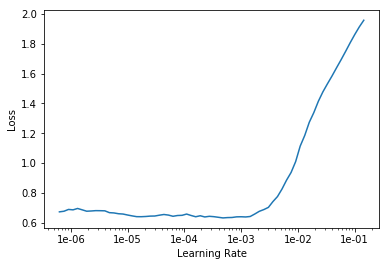

In [26]:
learn.recorder.plot()

In [27]:
# learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

In [28]:
learn.save('arch-rnet34-s2')

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

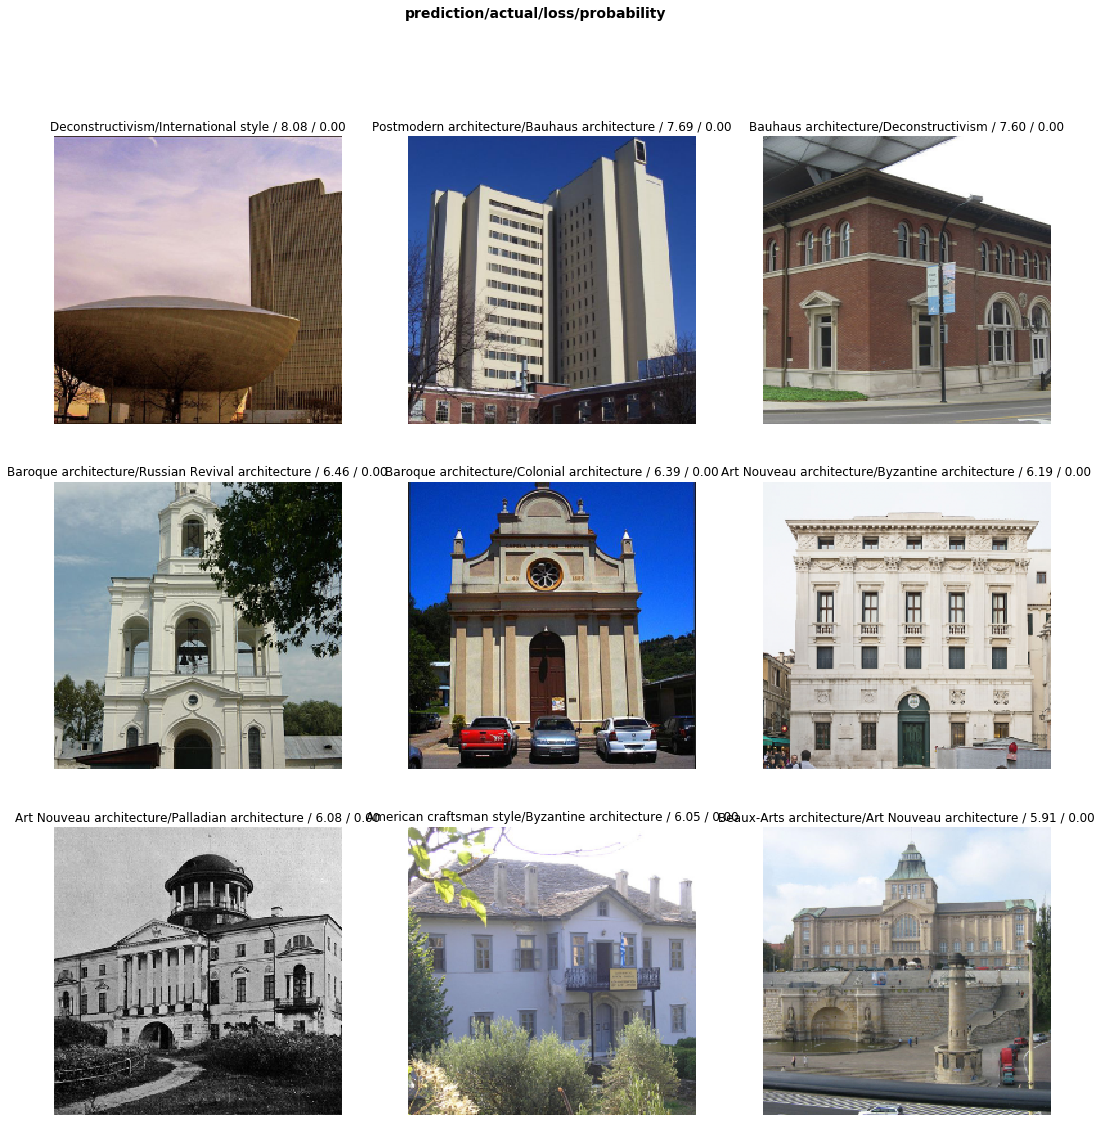

In [34]:
interp.plot_top_losses(9, figsize=(18,18))

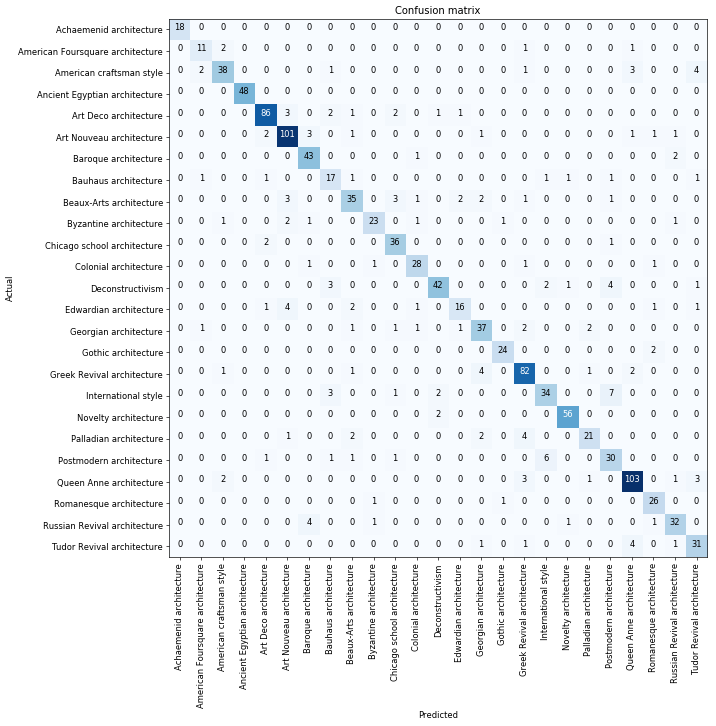

In [31]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [32]:
interp.most_confused(min_val=2)

[('International style', 'Postmodern architecture', 7),
 ('Postmodern architecture', 'International style', 6),
 ('American craftsman style', 'Tudor Revival architecture', 4),
 ('Deconstructivism', 'Postmodern architecture', 4),
 ('Edwardian architecture', 'Art Nouveau architecture', 4),
 ('Greek Revival architecture', 'Georgian architecture', 4),
 ('Palladian architecture', 'Greek Revival architecture', 4),
 ('Russian Revival architecture', 'Baroque architecture', 4),
 ('Tudor Revival architecture', 'Queen Anne architecture', 4),
 ('American craftsman style', 'Queen Anne architecture', 3),
 ('Art Deco architecture', 'Art Nouveau architecture', 3),
 ('Art Nouveau architecture', 'Baroque architecture', 3),
 ('Beaux-Arts architecture', 'Art Nouveau architecture', 3),
 ('Beaux-Arts architecture', 'Chicago school architecture', 3),
 ('Deconstructivism', 'Bauhaus architecture', 3),
 ('International style', 'Bauhaus architecture', 3),
 ('Queen Anne architecture', 'Greek Revival architecture'

## Look at 

In [103]:
losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

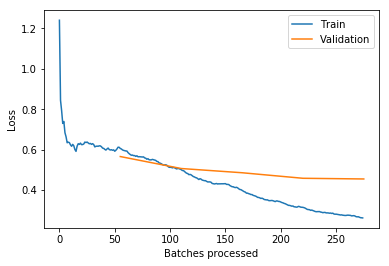

In [107]:
learn.recorder.plot_losses()

In [106]:
from fastai.widgets import *
fd = FileDeleter()

NameError: name 'FileDeleter' is not defined

# Predict a novel image

Now we can download an image from the internet and predict its class with the following code. I'll need to look more into whats involved in serving this via api or running it on a cpu only computer, but for now this is very neat... especially because it got it right!

In [ ]:
img = open_image('./gaudi.jpg')

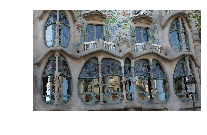

In [101]:
img.show()

In [102]:
learn.predict(img)

(Category Art Nouveau architecture,
 tensor(5),
 tensor([8.1215e-05, 1.1345e-05, 1.4106e-04, 5.4161e-06, 6.5375e-04, 9.9589e-01,
         6.6542e-06, 3.7043e-05, 4.6016e-05, 1.5490e-04, 4.3584e-05, 2.9573e-05,
         1.7510e-04, 4.4927e-05, 1.5719e-05, 9.1962e-05, 9.5747e-07, 1.5355e-04,
         1.5353e-03, 8.2802e-05, 2.8230e-06, 5.3286e-04, 1.1750e-04, 4.1530e-05,
         1.0058e-04]))

# Inspect

Code copied from https://github.com/xbno/maps/blob/master/nbs/big_resnet50-interpret-gradcam-dogs.ipynb

### grad cam

In [41]:
from fastai import *
from fastai.vision import *
import re
import scipy.ndimage
%matplotlib 

import fastai
fastai.__version__

Using matplotlib backend: agg


'1.0.42'

In [39]:
target_layer = learn.model[0][7][2]

In [42]:
fmap_hook = fastai.callbacks.hook_output(target_layer)

In [43]:
def gradient_torch_hook(self, grad_input, grad_output):
    return grad_input

gradient_hook = fastai.callbacks.Hook(target_layer, gradient_torch_hook, is_forward=False)

In [77]:
# we start by extracting a batch then choosing one image and label from that batch
# i is the index of the chosen image
i = 10
image_batch, label_batch = next(iter(learn.data.train_dl))
image = image_batch[i].reshape(1, 3, 224, 224)
label = label_batch[i].reshape(-1)

In [78]:
learn.model.eval();

In [79]:
# runn the forward pass
learn.model.zero_grad();
out = learn.model(image)

In [80]:
out

tensor([[-2.2894, -0.0848, -0.3362, -2.9972,  1.1048,  2.9276, -0.0309, -3.4578,
          5.4885, -0.3207, -1.1082, -0.2607, -3.0834, -0.5700,  4.2471, -1.9080,
          8.6111, -4.1969, -1.8119,  3.8385, -4.3491, -0.3294, -3.1613, -1.4623,
         -3.6916]], device='cuda:0', grad_fn=<AddmmBackward>)

In [81]:
# we need to set the gradients at the output to ones at the predicted class
# and zero everywere else
onehot = torch.zeros(learn.data.c)
onehot[torch.argmax(out)] = 1.0

In [82]:
# we then backprop from there
out.backward(gradient=onehot.reshape(1, -1).cuda(), retain_graph=True)

In [83]:
gradients = next(iter(gradient_hook.stored))
gradients.shape

torch.Size([1, 512, 7, 7])

In [84]:
gradient_linearization = gradients.cpu().numpy().sum((2, 3)).reshape(-1)
fmaps = fmap_hook.stored.cpu().numpy()
print(fmaps.shape)
fmaps = fmaps.reshape(512, 7, 7)

(1, 512, 7, 7)


In [85]:
# relu on the heatmap
heatmap = np.maximum(0, np.einsum('i, ijk',gradient_linearization, fmaps))

# we now upsample the heatmap so we can overlay it on our original image
upsampled = scipy.ndimage.zoom(heatmap, 32)
upsampled = (upsampled - np.min(upsampled))/(np.max(upsampled) - np.min(upsampled))

In [86]:
def image_from_tensor(imagetensor):
    numpied = torch.squeeze(imagetensor)
    numpied = np.moveaxis(numpied.cpu().numpy(), 0 , -1)
    numpied = numpied - np.min(numpied)
    numpied = numpied/np.max(numpied)
    return numpied

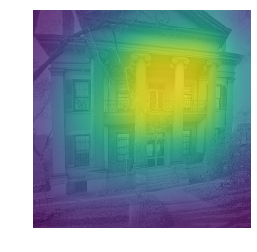

In [87]:
plt.imshow(image_from_tensor(image))
plt.imshow(upsampled, alpha=.8)
plt.gca().set_axis_off()

## guided backprop

In [88]:
## this callback will make all gradients positive during backprop
def clamp_gradients_hook(module, grad_in, grad_out):
    for grad in grad_in:
        torch.clamp_(grad, min=0.0)

In [89]:
## we inventory all Relu Modules
relu_modules = [module[1] for module in learn.model.named_modules() if str(module[1]) == "ReLU(inplace)"]
len(relu_modules)

18

In [90]:
## and register our hooks with fastai
hooks = fastai.callbacks.Hooks(relu_modules, clamp_gradients_hook, is_forward=False)

In [91]:
learn.model.eval()
image.requires_grad_()
learn.model.zero_grad()
out = learn.model(image)

In [92]:
out.backward(gradient=onehot.reshape(1, -1).cuda(), retain_graph=True)

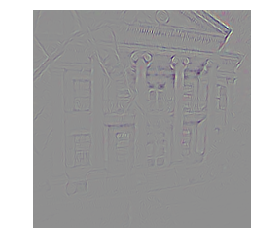

In [93]:
plt.imshow(image_from_tensor(image.grad))
plt.gca().set_axis_off()